# COVID-19 Numbers of Cases by Country

Data source: https://github.com/CSSEGISandData/COVID-19 by Johns Hopkins University

In [1]:
%matplotlib inline

In [15]:
import pandas as pd
from utilities import *
print(pd.__version__)

0.23.4


## Cumulated confirmed cases in the most infected countries

In [3]:
data_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
data_confirmed_c = merge_locals(data_confirmed)

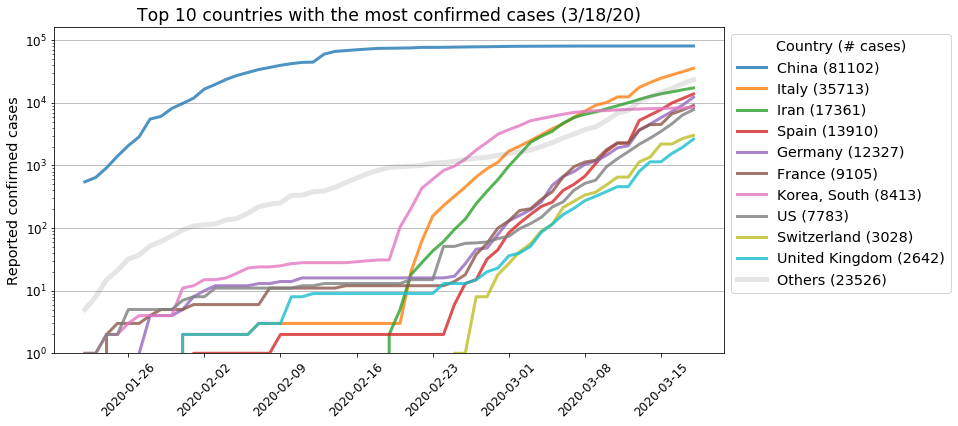

In [4]:
plot_cumulated_histories(data_confirmed_c, 0, 10, 'Top 10 countries with the most confirmed cases', plot_remaining=True)

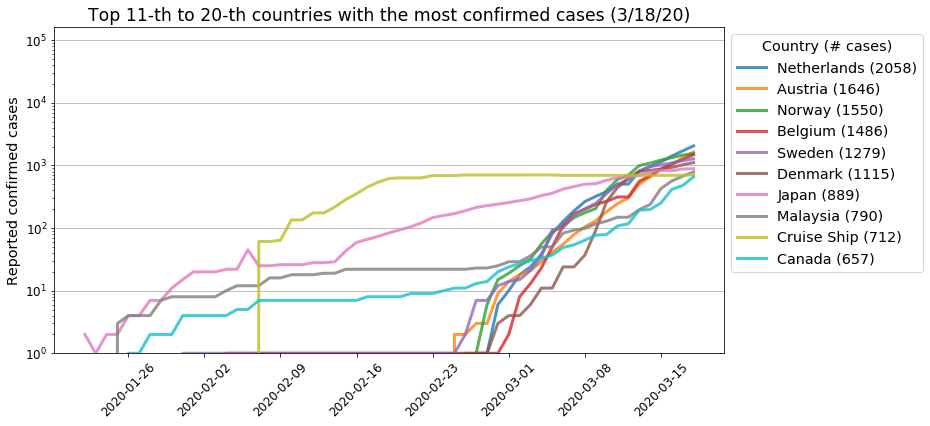

In [5]:
plot_cumulated_histories(data_confirmed_c, 10, 20, 'Top 11-th to 20-th countries with the most confirmed cases');

## Cumulated deaths in the countries with heighest number of deaths

In [6]:
data_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
data_deaths_c = merge_locals(data_deaths)

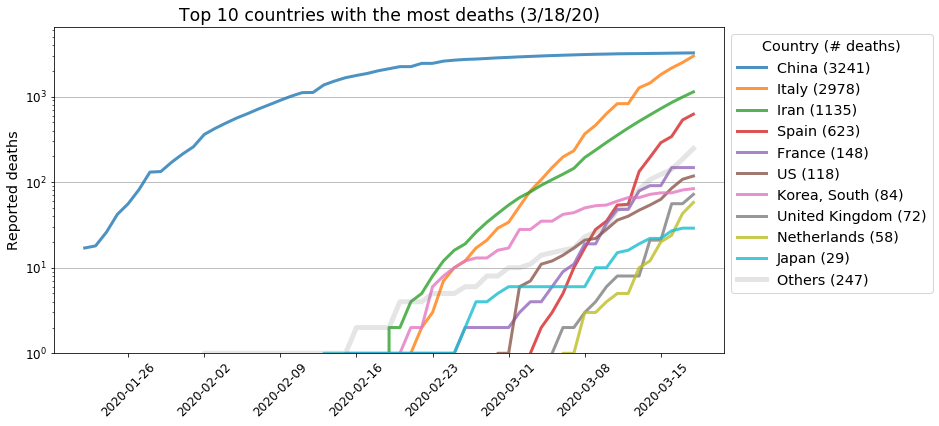

In [7]:
plot_cumulated_histories(data_deaths_c, 0, 10,'Top 10 countries with the most deaths', case='deaths', plot_remaining=True);

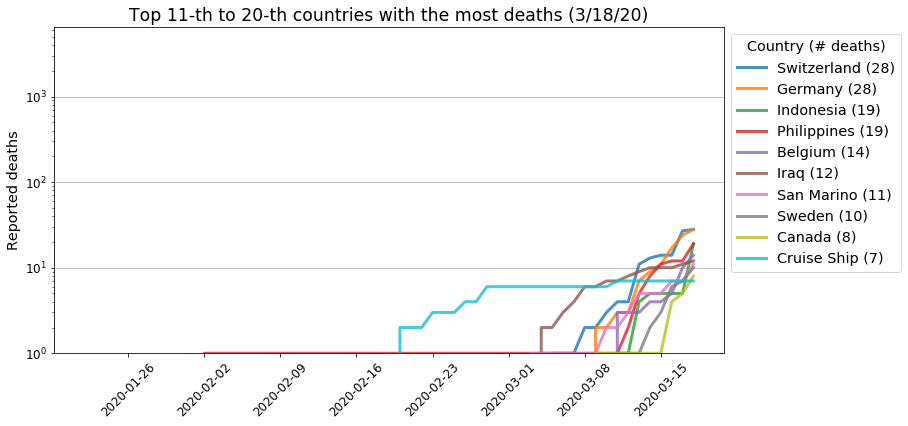

In [8]:
plot_cumulated_histories(data_deaths_c, 10, 20, 'Top 11-th to 20-th countries with the most deaths', case='deaths', plot_remaining=False);

## Daily increase rate

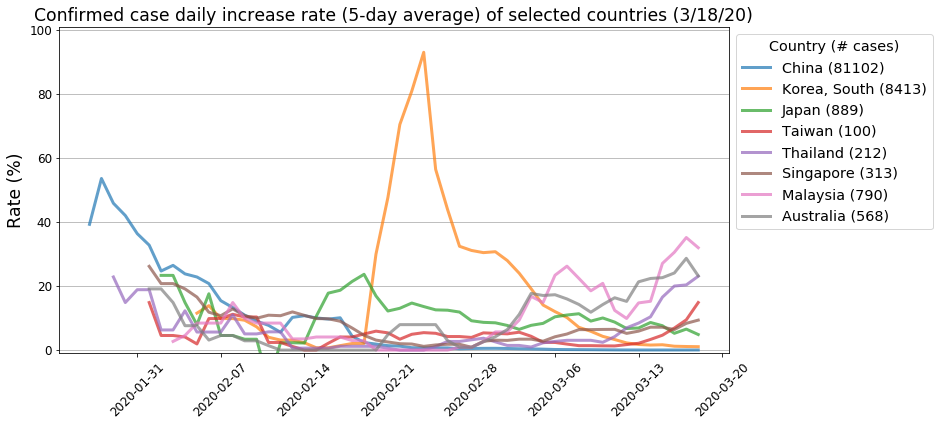

In [18]:
plot_average_rate(data_confirmed_c, 5, ['China', 'Korea, South', 'Japan', 'Taiwan', 'Thailand', 'Singapore', 'Malaysia', 'Inida', 'Australia'], threshold=5)

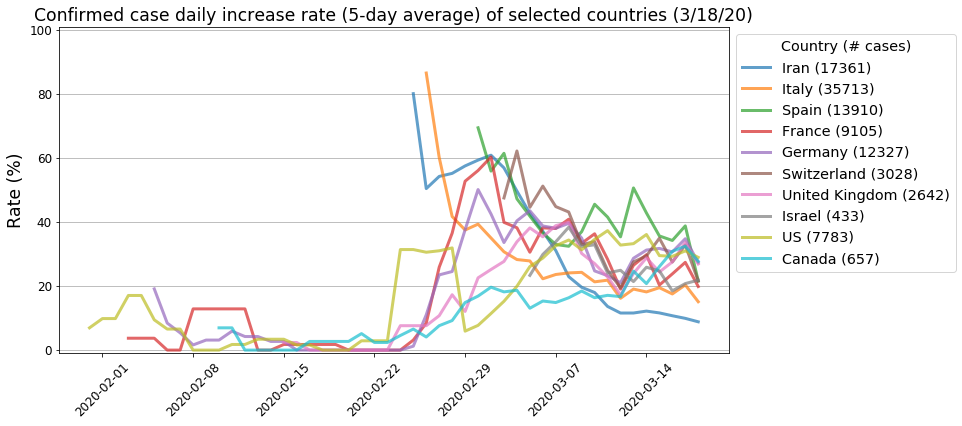

In [17]:
plot_average_rate(data_confirmed_c, 5, ['Iran', 'Italy', 'Spain', 'France', 'Germany', 'Switzerland', 'United Kingdom', 'Israel', 'US', 'Canada'], threshold=5)